### Imports

In [1]:
from LoopStructural import GeologicalModel
from LoopStructural.visualisation import LavaVuModelViewer
from LoopStructural.datasets import load_intrusion
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext snakeviz

/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.decomposition.pca module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.decomposition. Anything that cannot be imported from sklearn.decomposition is now part of the private API.
  warnings.warn(message, FutureWarning)
Cannot import Surfe


In [2]:
data, bb = load_intrusion()

In [3]:
fault_data = data[data['type']=='fault']

In [4]:
fault_data

,X,Y,Z,val,coord,type,nx,ny,nz
0,0.0,5500.0,0.0,0.0,0.0,fault,NaN,NaN,NaN
1,300.0,5500.0,0.0,0.0,0.0,fault,NaN,NaN,NaN
2,600.0,5500.0,0.0,0.0,0.0,fault,NaN,NaN,NaN
3,900.0,5500.0,0.0,0.0,0.0,fault,NaN,NaN,NaN
4,1200.0,5500.0,0.0,0.0,0.0,fault,NaN,NaN,NaN
5,1500.0,5500.0,0.0,0.0,0.0,fault,NaN,NaN,NaN
6,1800.0,5500.0,0.0,0.0,0.0,fault,NaN,NaN,NaN
7,2100.0,5500.0,0.0,0.0,0.0,fault,NaN,NaN,NaN
8,2400.0,5500.0,0.0,0.0,0.0,fault,NaN,NaN,NaN
9,2700.0,5500.0,0.0,0.0,0.0,fault,NaN,NaN,NaN


In [5]:
model = GeologicalModel(bb[0,:],bb[1,:])
model.set_model_data(fault_data)
fault = model.create_and_add_fault('fault',
                                   -600,
                                   nelements=2000,
                                   steps=4,
                                   interpolatortype='PLI',
                                  buffer=0.3
                                  )


In [6]:
bedding_val = np.random.random((40,4))
bedding_val[:,0]*=bb[1,0]
bedding_val[:,1]*=bb[1,1]
bedding_val[:,2]=-600
bedding_val[:,3]=0
bedding_val = np.vstack([bedding_val,bedding_val])
bedding_val[40:,2]-=-500
bedding_val[40:,3]= -1
# print(bedding_val)
# print(fault['feature'].evaluate(model.scale(bedding_val)))
bedding_val[:,:3] = model.rescale(fault['feature'].apply_to_points(model.scale(bedding_val[:,:3])))

# print(bedding_val)

In [7]:
new_data = pd.DataFrame(bedding_val,columns=['X','Y','Z','val'])
new_data['type'] = 'strati'
# new_data['val'] = 0

In [8]:
# normal_vec = pd.DataFrame([[9000,10,10,0,0,1]],columns=['X','Y','Z','nx','ny','nz'])
# normal_vec['type'] = 'strati'

data = pd.concat([fault_data,new_data],sort=False)
data

,X,Y,Z,val,coord,type,nx,ny,nz
0,0.000000,5500.000000,0.000000,0.0,0.0,fault,NaN,NaN,NaN
1,300.000000,5500.000000,0.000000,0.0,0.0,fault,NaN,NaN,NaN
2,600.000000,5500.000000,0.000000,0.0,0.0,fault,NaN,NaN,NaN
3,900.000000,5500.000000,0.000000,0.0,0.0,fault,NaN,NaN,NaN
4,1200.000000,5500.000000,0.000000,0.0,0.0,fault,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
75,3493.005345,1889.764172,-542.866698,-1.0,NaN,strati,NaN,NaN,NaN
76,8222.717424,-85.599376,-542.862967,-1.0,NaN,strati,NaN,NaN,NaN
77,9301.896578,7740.593922,-100.000000,-1.0,NaN,strati,NaN,NaN,NaN
78,3693.092928,8242.937277,-100.000000,-1.0,NaN,strati,NaN,NaN,NaN


In [9]:
def planeFit(points):
    """
    p, n = planeFit(points)

    Given an array, points, of shape (d,...)
    representing points in d-dimensional space,
    fit an d-dimensional plane to the points.
    Return a point, p, on the plane (the point-cloud centroid),
    and the normal, n.
    """
    import numpy as np
    from numpy.linalg import svd
    #points = points.T
    #print('p',points.shape)
#     points = np.reshape(points, (np.shape(points)[0], -1)) # Collapse trialing dimensions
    assert points.shape[0] <= points.shape[1], "There are only {} points in {} dimensions.".format(points.shape[1], points.shape[0])
    ctr = points.mean(axis=1)
    x = points - ctr[:,np.newaxis]
    M = np.dot(x, x.T) # Could also use np.cov(x) here.
    U,S,V = svd(M)
    normal = V[-1]
    d = -np.sum(normal*ctr)
    return np.hstack([normal,[d]])

def planeDistance(points):
    params = planeFit(points)
    a, b, c, d = params
    x, y, z = points
    length = np.sqrt(a**2 + b**2 + c**2)
    return (np.abs(a * x + b * y + c * z + d) / length).mean()



In [10]:
import emcee

In [11]:
def log_prior(theta):
    displacement, sigma, sigma2, mu = theta
    if sigma <= 0:
        return -np.inf
    if mu <= 0:
        return -np.inf
    if sigma2 <= 0:
        return -np.inf
    return -np.log(1.0/(np.sqrt(2*np.pi)*sigma))-0.5*(displacement-mu)**2/sigma**2 - np.log(sigma) - np.log(mu) - np.log(sigma2)

In [12]:
import dill as pickle

In [13]:
model = GeologicalModel(bb[0,:],bb[1,:],reuse_supports=True)
model.set_model_data(data)
fault = model.create_and_add_fault('fault',
                                   10,
                                   nelements=2000,
                                   steps=1,
                                   interpolatortype='PLI',
                                  buffer=0.8,
                                   solver='pyamg'
                                  )
def log_likelihood(theta):
    displacement, sigma, sigma2, mu = theta
#     print("displacement: {}".format(displacement))
    fault['feature'].set_displacement(displacement)

    #strati['feature'].get_interpolator().data_added = False
    strati = model.create_and_add_foliation('strati',
                                            nelements=2000,
                                            interpolatortype='PLI',
                                            cgw=0.1,
                                            solver='fake',
                                            buffer=1
                                           )
    strati['feature'].builder.add_data_to_interpolator()
    points = strati['feature'].get_interpolator().get_value_constraints()[:,:4]
    unique_values = np.unique(points[:,3])
    distance = np.zeros_like(unique_values).astype(float)
    for i, u in enumerate(unique_values):
        distance[i] = planeDistance(points[points[:,3] == u,:3].T)
    
#     print(np.sum(distance*model.scale_factor))    
#     plt.hist(strati['feature'].evaluate_value_misfit())
    n = len(distance)#strati['feature'].interpolator.get_value_constraints()[:,:3].shape[0]
    log_like = -0.5 * np.sum(np.log(2 * np.pi * sigma2 ** 2) + (0 - model.scale_factor*distance) ** 2 / sigma2 ** 2)
    #data_added = False

#     sigma2 = 3
#     log_like = -(n/2)*np.log(2*np.pi) - (n/2)*np.log(sigma2)
#     log_like-= (1/(2*sigma2))*np.sum(np.abs(strati['feature'].evaluate_value_misfit())**2)
    
#     sigma2 = strati['feature'].evaluate_value(strati['feature'].interpolator.get_value_constraints()[:,:3]) ** 2 
#     log_like = -0.5 * np.sum((strati['feature'].evaluate_value_misfit()) ** 2 / sigma2 + np.log(sigma2))
#     print("log likelihood {}".format(log_like))
#     print("missfit {}".format(np.sum(strati['feature'].evaluate_value_misfit())))
    if ~np.isfinite(log_like):
        return -np.inf
#     pickle.dump(model,open("models/model2_sigma_{}_mu_{}_displacement_{}.pkl".format(sigma,mu,displacement),"wb"))
    return log_like                         


In [15]:
def log_probability(theta):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    ll = log_likelihood(theta)
    return lp + log_likelihood(theta)

In [16]:
import emcee
start = np.array([600,0,0,0])
pos = start + np.array([1e3,1e2,10,6e2]) * np.random.randn(50, 4)
pos[:,1:] = np.abs(pos[:,1:])
nwalkers, ndim = pos.shape

In [17]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability)
sampler.run_mcmc(pos, 20, progress=True,tune=True)

100%|██████████| 20/20 [04:18<00:00, 12.91s/it]


State([[ 924.21958186   86.75399716    6.28803347  317.29119927]
 [ 467.68794839   91.53730883   12.26473162  328.17911668]
 [ 660.2853735   130.3543673     8.54271847  328.62298628]
 [ 583.7874019    88.78890933    4.27343312  671.05216949]
 [ 568.75944815  128.37644153    7.2258709   668.53698031]
 [  18.95952024  262.81333138   52.364651    353.58366284]
 [ 567.13756613   94.39188148    4.04978201  552.00815107]
 [ 616.76752867   71.70859543    5.66196575  706.12904459]
 [ 674.32703815  114.05411683   12.15216387  530.06857731]
 [ 574.78335227   93.66297624   10.5405397   446.10364115]
 [ 557.87406276  190.89969853   10.42559079   50.15998841]
 [ 447.01776348  234.14501471   53.9311614   261.91430932]
 [ 668.05848313  122.23727055    7.85774594  287.55247179]
 [ 889.86158244  385.60245193   42.55576177  622.28592077]
 [ 481.28146503  125.12752448   26.53450449  287.26733452]
 [ 524.39437407   74.50219949    6.31818556  346.02638067]
 [ 590.18557571  144.91019185   22.18050113  295.3

In [22]:
flat_samples = sampler.get_chain(discard=10, flat=True)

(array([  1.,   9.,  27.,  51., 237., 101.,  37.,  14.,  19.,   4.]),
 array([-138.45572702,   17.23666388,  172.92905477,  328.62144567,
         484.31383657,  640.00622746,  795.69861836,  951.39100925,
        1107.08340015, 1262.77579105, 1418.46818194]),
 <a list of 10 Patch objects>)

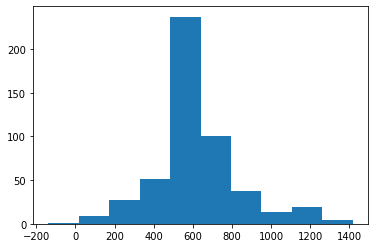

In [23]:
plt.hist(flat_samples[:,0])

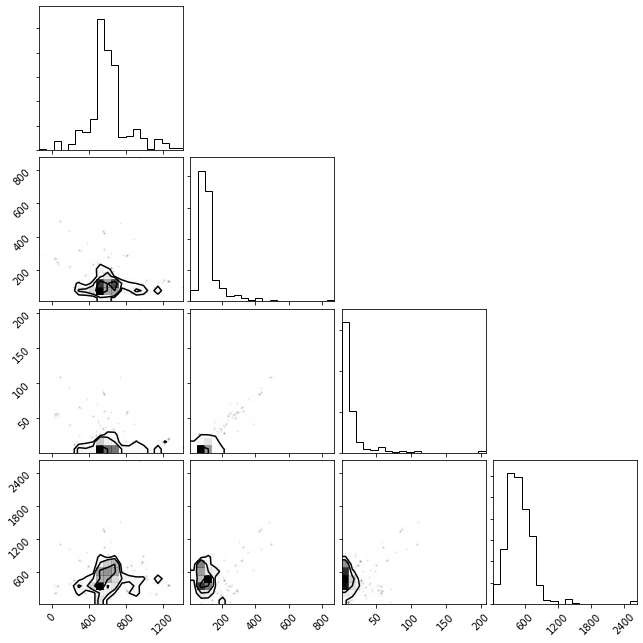

In [25]:
import corner
flat_samples.shape
fig = corner.corner(
    flat_samples
);

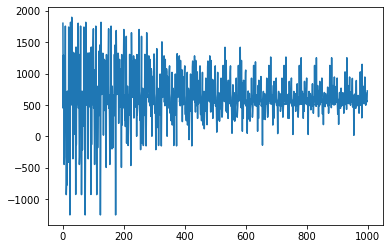

In [26]:
plt.plot(sampler.get_chain(flat=True)[:,0])

In [ ]:
chain = sampler.get_chain()

In [ ]:
chain.shape

In [ ]:
for i in range(20):
    plt.plot(chain[:,i,0])

In [ ]:
for i in range(20):
    plt.plot(chain[:,i,1])

array([1122.66940475,  483.664629  ,  515.77644001,  569.99856899,
        387.43749434,   68.8208793 ,  618.58404008,  672.22367459,
       1019.64558914,  263.18666596,  559.07077598,  430.8052094 ,
        695.48667806,  632.89303946,  243.41059359,  433.15568523,
        538.52182591,  653.07171587,  543.04791193,  927.64116055,
        435.03251717,  642.30695234,  306.7219904 ,  320.16519978,
        485.42434862, 1107.6427964 , 1129.52038779,  603.49548667,
        564.36271811,  975.96231086,  989.91733888,  676.01752118,
       1418.46818194,  547.50926789,  662.46490774,  403.77914988,
       1208.91176549,  535.36866523,  651.30104362,  380.78032343,
        777.32225712,  850.06052889,  287.66903251,  893.62069631,
        514.58090719,  676.70881038,  527.47334724,  585.734353  ,
        702.62804781, 1014.85662547, 1122.66940475,  483.664629  ,
        515.77644001,  569.99856899,  387.43749434,   51.05787312,
        618.58404008,  668.0075751 ,  822.05057644,  263.18666

In [ ]:
flat_samples[:,0]